## Importing Required Libraries

In [1]:
#Uncomment to download the library required to test CEC test functions
#!pip install opfunu
#!pip install --upgrade opfunu

In [2]:
#Functions to handle with relative imports
import sys
sys.path.insert(1, '../MetaPy/DifferentialEvolution')

In [3]:
#Imports of class and functions required
from DifferentialEvolution import DifferentialEvolution

from DifferentialEvolution_Clustering import DifferentialEvolution_Clustering
from sklearn import cluster

import math

from PlottingFunctions import PlottingSnapshots , PlottingOptimalsFound , MultiPlottingOptimalsFound
from AuxiliarFunctions import objectiveFunctionCEC , individual

import opfunu

In [4]:
print(f"Function's name = {opfunu.cec_based.cec2017.F92017.name}\nFunction's optimum X = {opfunu.cec_based.cec2017.F92017(2).x_global}")

Function's name = F9: Shifted and Rotated Schwefel’s Function
Function's optimum X = [-24.85625428   0.93425322]


## Differential Evolution

In [5]:
#Init Diff Evol Clustering
functionNumber = '9'
dimension = 2  #Dimensions = 2, 10, 20, 30, 50 or 100. Some functions doesn't work with all dimensions
objectiveFunction = objectiveFunctionCEC(functionNumber,dimension=dimension)

lower , upper = -100 , 100
initializeIndividual = individual(lower,upper,dimension)

DiffEvol = DifferentialEvolution(objectiveFunction,initializeIndividual)

In [6]:
#Calling Diff Evol to find optimal
iterations = 100
populationSize = 200
scalingFactor = 0.5
crossoverRate = 0.5

optimalFound , snapshots = DiffEvol(iterations,populationSize,scalingFactor,crossoverRate)
optimalFound , objectiveFunction(optimalFound)

(array([-0.13704544, 74.32169969]), np.float64(-175.04540552125036))

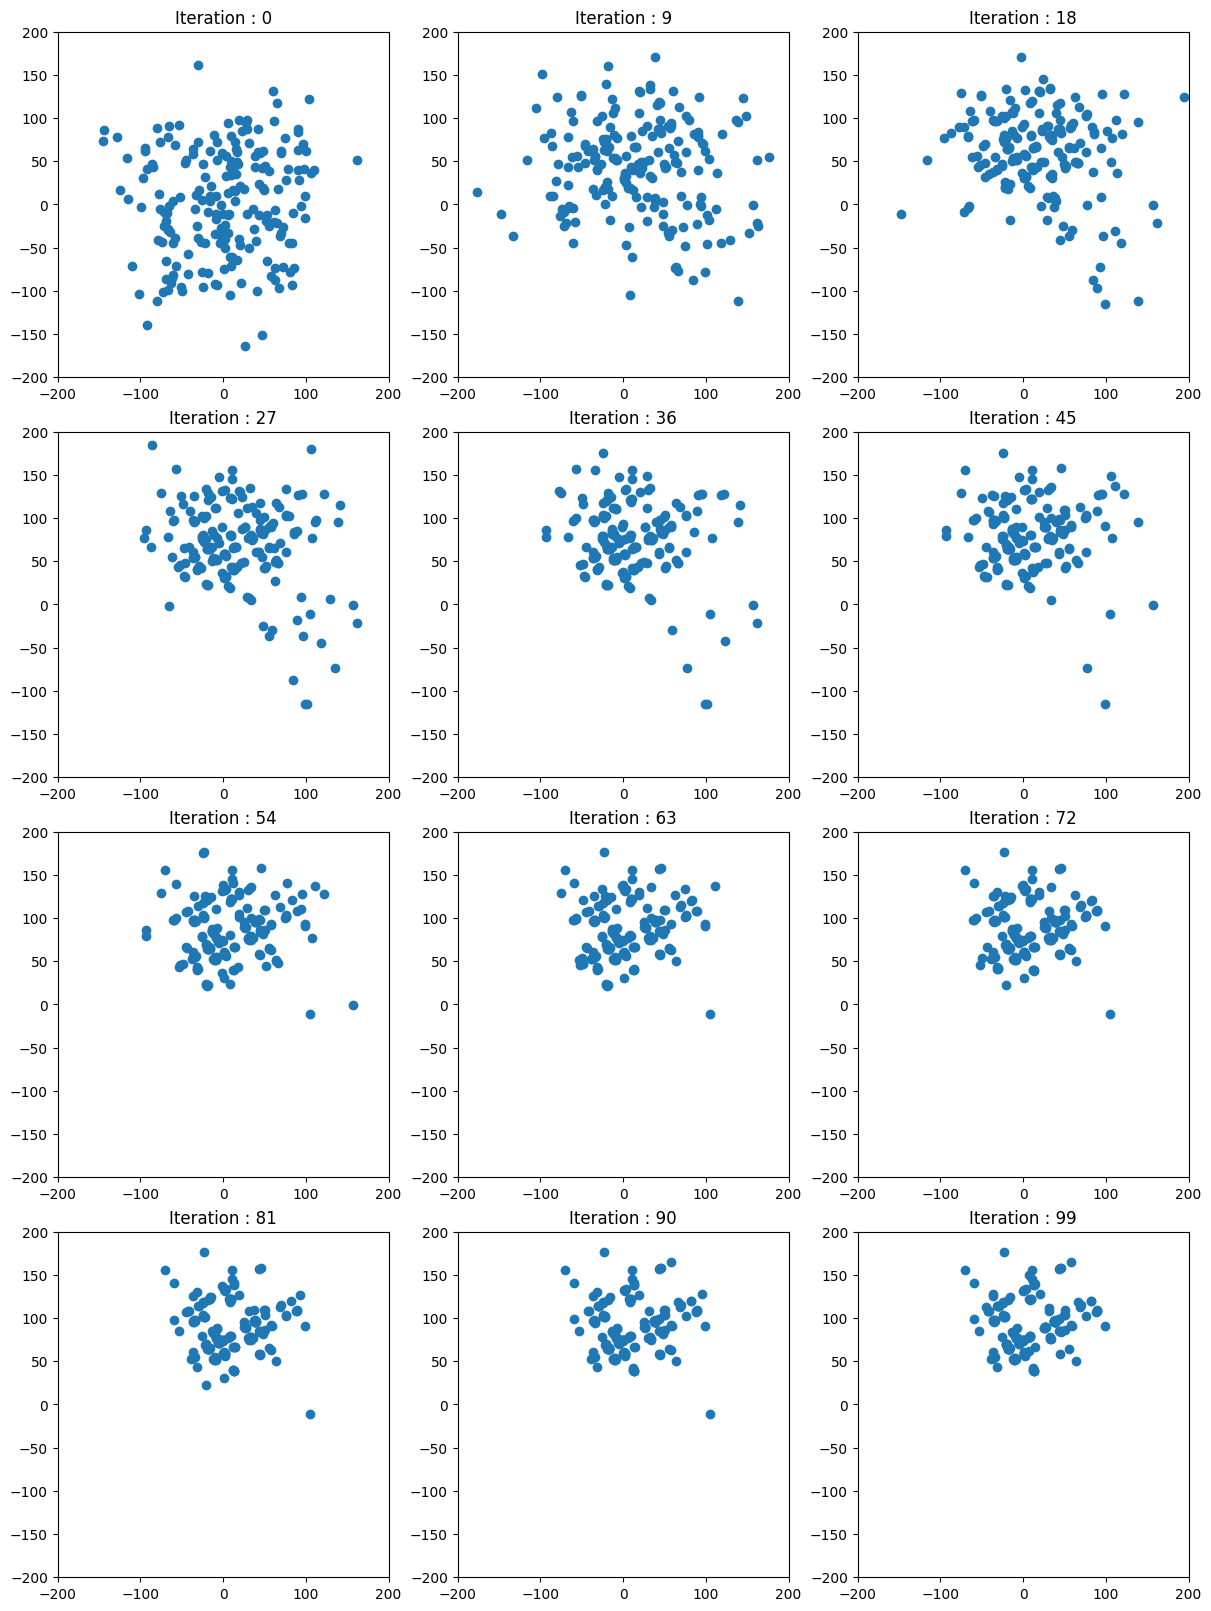

In [7]:
SubPlot_kw = {'autoscale_on':False,'xbound':(-200,200),'ybound':(-200,200)}

PlottingSnapshots(snapshots,9,SubPlot_kw)

## Differential Evolution -- DBSCAN

In [8]:
#Init Diff Evol Clustering
functionNumber = '9'
dimension = 2  #Dimensions = 2, 10, 20, 30, 50 or 100. Some functions doesn't work with all dimensions
objectiveFunction = objectiveFunctionCEC(functionNumber,dimension=dimension)

lower , upper = -100 , 100
initializeIndividual = individual(lower,upper,dimension)

clusteringAlgorithm = cluster.dbscan

DiffEvol_DBSCAN = DifferentialEvolution_Clustering(objectiveFunction,initializeIndividual,clusteringAlgorithm)

In [9]:
#Calling Diff Evol to find optimal
iterations = 100
populationSize = 200
scalingFactor = 0.5
crossoverRate = 0.5

clusteringAlgorithm_kw = {'eps':10,'min_samples':2}

optimalFound_DBSCAN , snapshots_DBSCAN = DiffEvol_DBSCAN(iterations,populationSize,scalingFactor,crossoverRate,clusteringAlgorithm_kw)
optimalFound_DBSCAN , objectiveFunction(optimalFound_DBSCAN)

(array([-8.43001812, 76.59162839]), np.float64(-113.01029751905207))

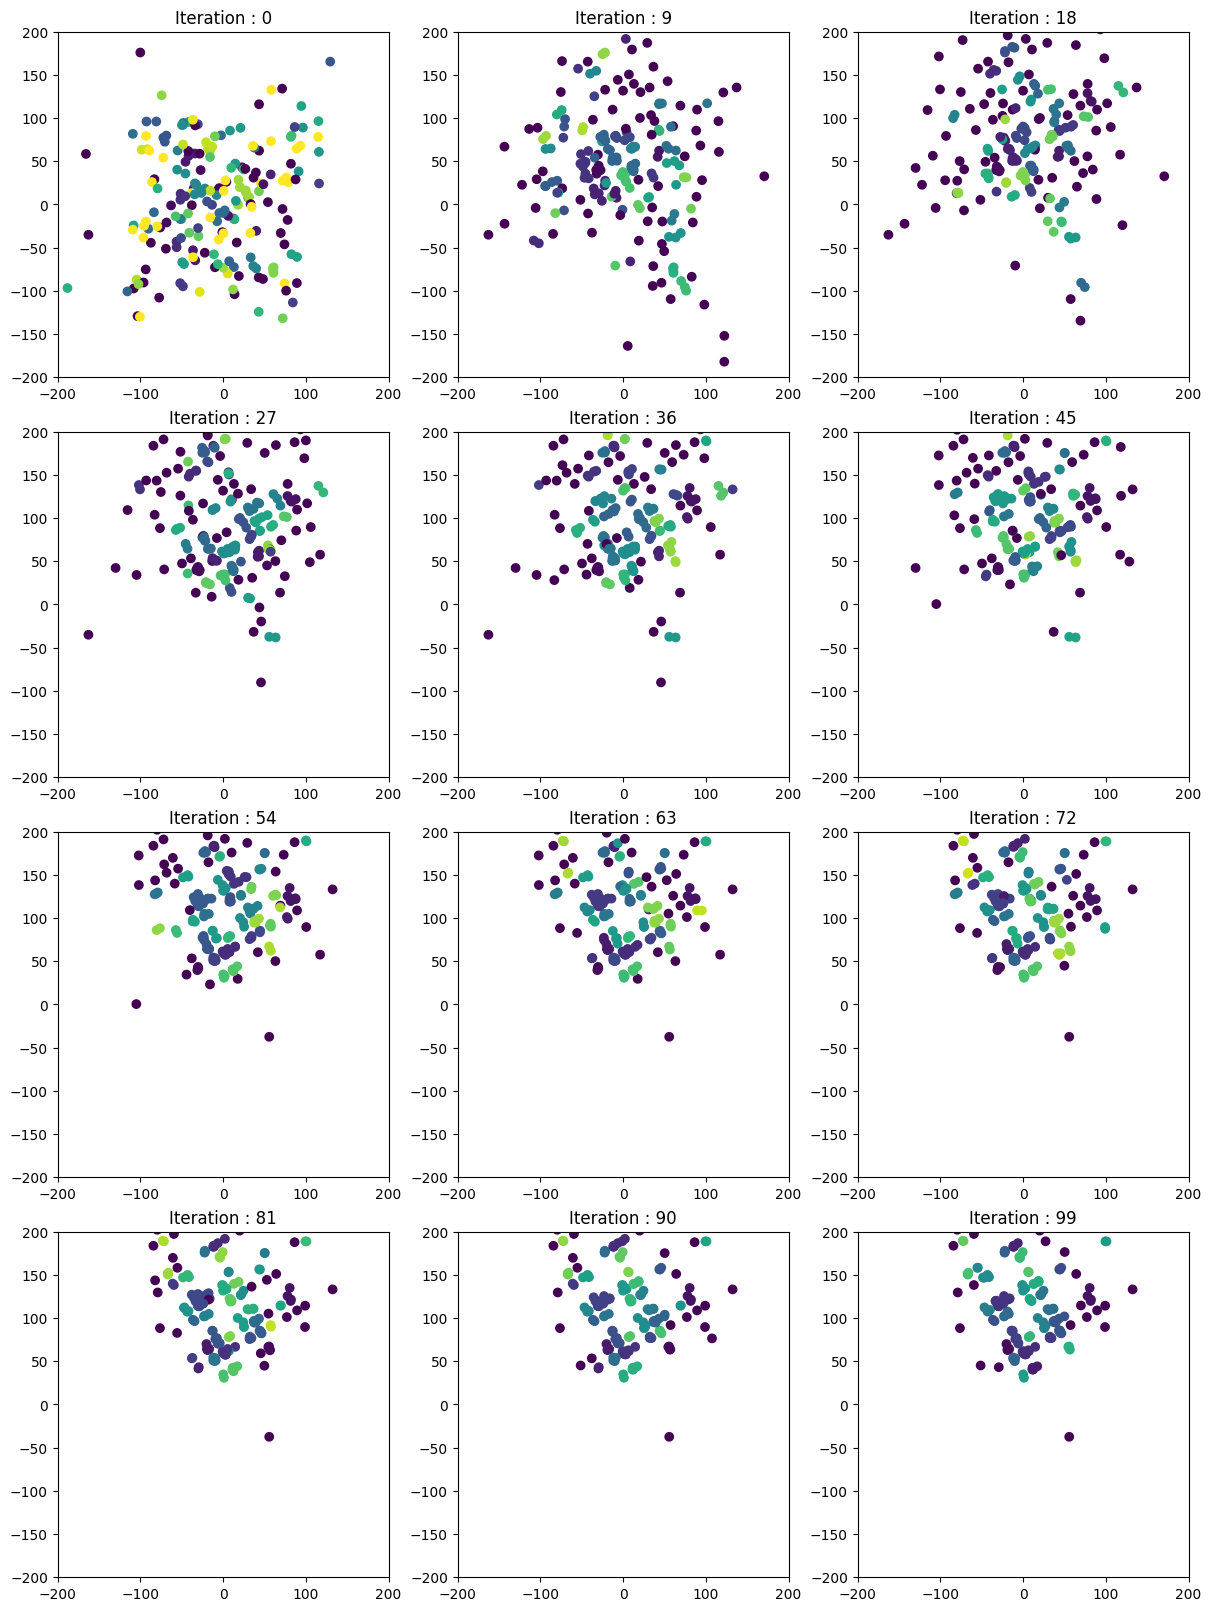

In [10]:
SubPlot_kw = {'autoscale_on':False,'xbound':(-200,200),'ybound':(-200,200)}
Scatter_kw = {'vmin':-1,'vmax':40,'cmap':'viridis'}

PlottingSnapshots(snapshots_DBSCAN,9,SubPlot_kw,Scatter_kw=Scatter_kw)

## Differential Evolution -- Agglomerative Clustering

In [11]:
#Init Diff Evol Clustering
functionNumber = '9'
dimension = 2  #Dimensions = 2, 10, 20, 30, 50 or 100. Some functions doesn't work with all dimensions
objectiveFunction = objectiveFunctionCEC(functionNumber,dimension=dimension)

lower , upper = -100 , 100
initializeIndividual = individual(lower,upper,dimension)

agglomerativeClustering = cluster.AgglomerativeClustering(n_clusters=None,distance_threshold=100)
clusteringAlgorithm = lambda population: agglomerativeClustering.fit_predict(population)

DiffEvol_Agglomerative = DifferentialEvolution_Clustering(objectiveFunction,initializeIndividual,clusteringAlgorithm)

In [12]:
#Calling Diff Evol to find optimal
iterations = 100
populationSize = 200
scalingFactor = 0.5
crossoverRate = 0.5

clusteringAlgorithm_kw = {}

optimalFound_Agglomerative , snapshots_Agglomerative = DiffEvol_Agglomerative(iterations,populationSize,scalingFactor,crossoverRate,clusteringAlgorithm_kw)
optimalFound_Agglomerative , objectiveFunction(optimalFound_Agglomerative)

(array([-8.633986  , 76.40689812]), np.float64(-130.21364848309145))

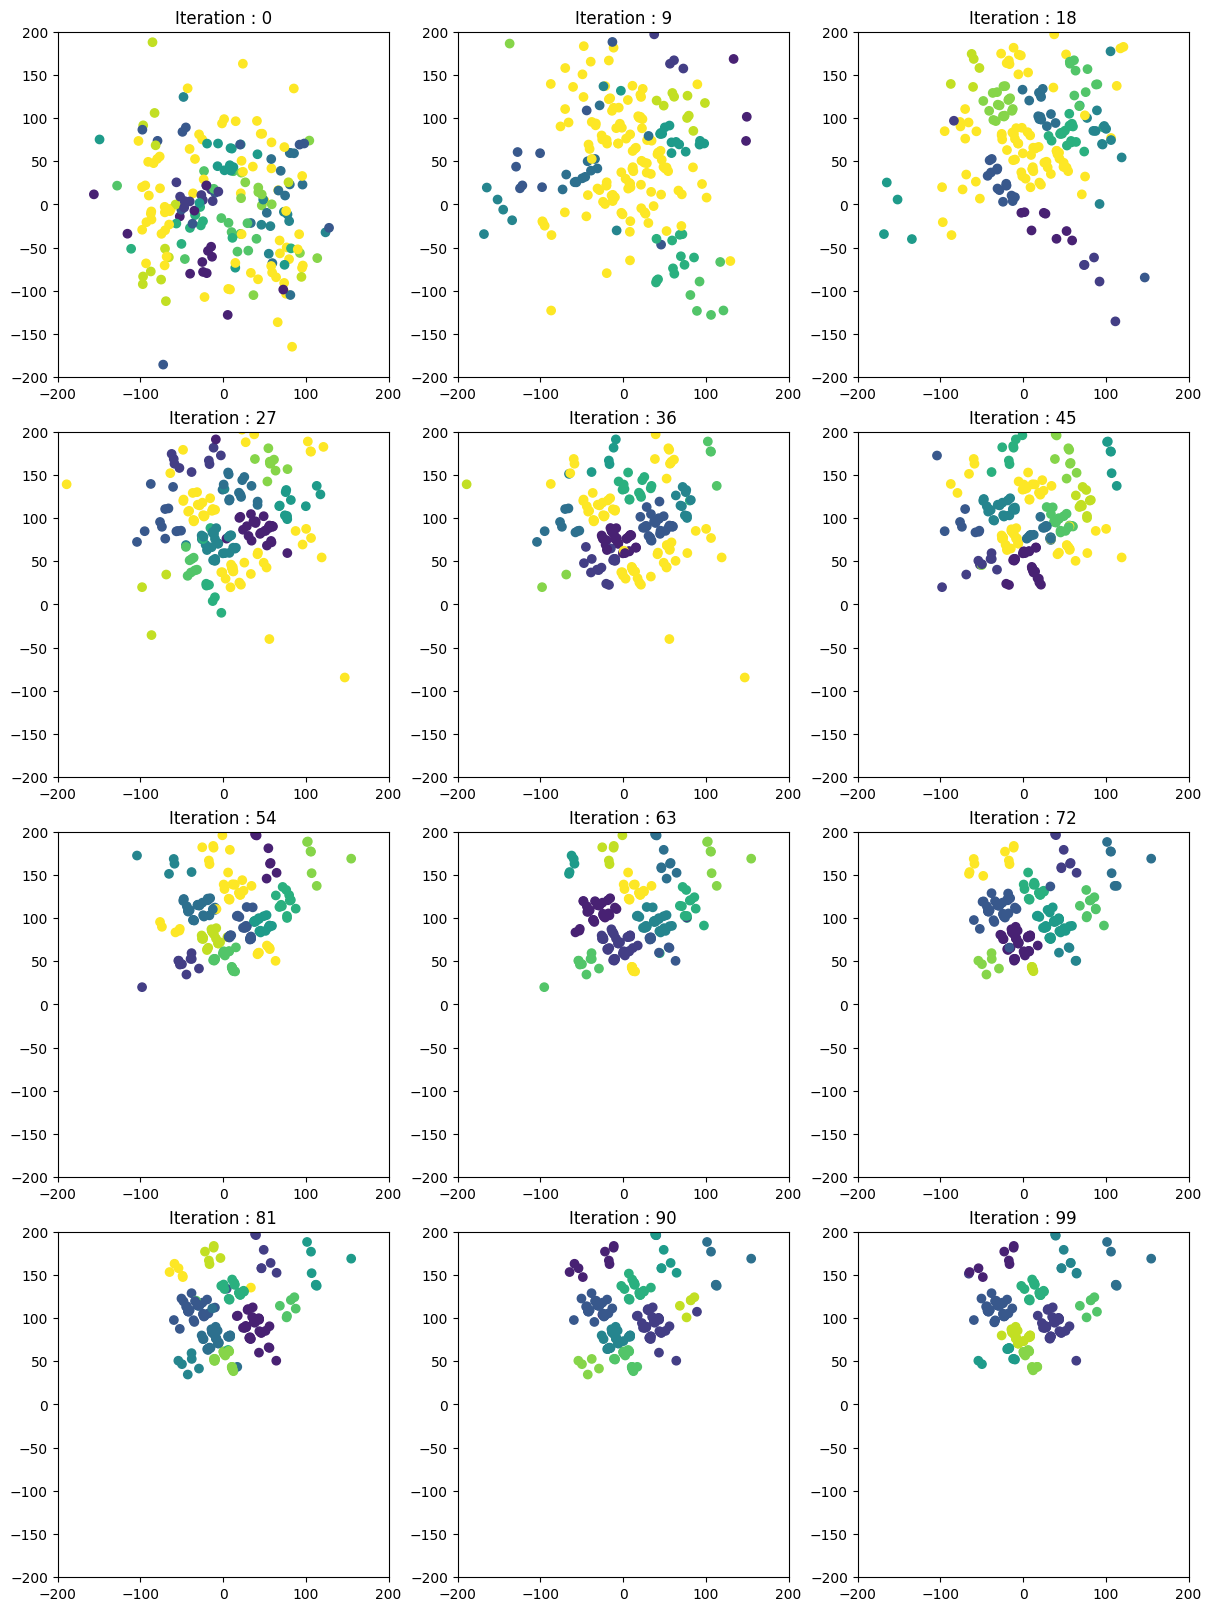

In [13]:
SubPlot_kw = {'autoscale_on':False,'xbound':(-200,200),'ybound':(-200,200)}
Scatter_kw = {'vmin':-1,'vmax':10,'cmap':'viridis'}

PlottingSnapshots(snapshots_Agglomerative,9,SubPlot_kw,Scatter_kw=Scatter_kw)

## Differential Evolution -- Kmeans

In [14]:
#Init Diff Evol Clustering
functionNumber = '9'
dimension = 2  #Dimensions = 2, 10, 20, 30, 50 or 100. Some functions doesn't work with all dimensions
objectiveFunction = objectiveFunctionCEC(functionNumber,dimension=dimension)

lower , upper = -100 , 100
initializeIndividual = individual(lower,upper,dimension)

clusteringAlgorithm = cluster.k_means

DiffEvol_kmeans = DifferentialEvolution_Clustering(objectiveFunction,initializeIndividual,clusteringAlgorithm)

In [15]:
#Calling Diff Evol to find optimal
iterations = 100
populationSize = 200
scalingFactor = 0.5
crossoverRate = 0.5

clusteringAlgorithm_kw = {'n_clusters':math.ceil(math.sqrt(populationSize))}

optimalFound_kmeans , snapshots_kmeans = DiffEvol_kmeans(iterations,populationSize,scalingFactor,crossoverRate,clusteringAlgorithm_kw)
optimalFound_kmeans , objectiveFunction(optimalFound_kmeans)

(array([43.31331712, 98.96219851]), np.float64(-128.9779946627168))

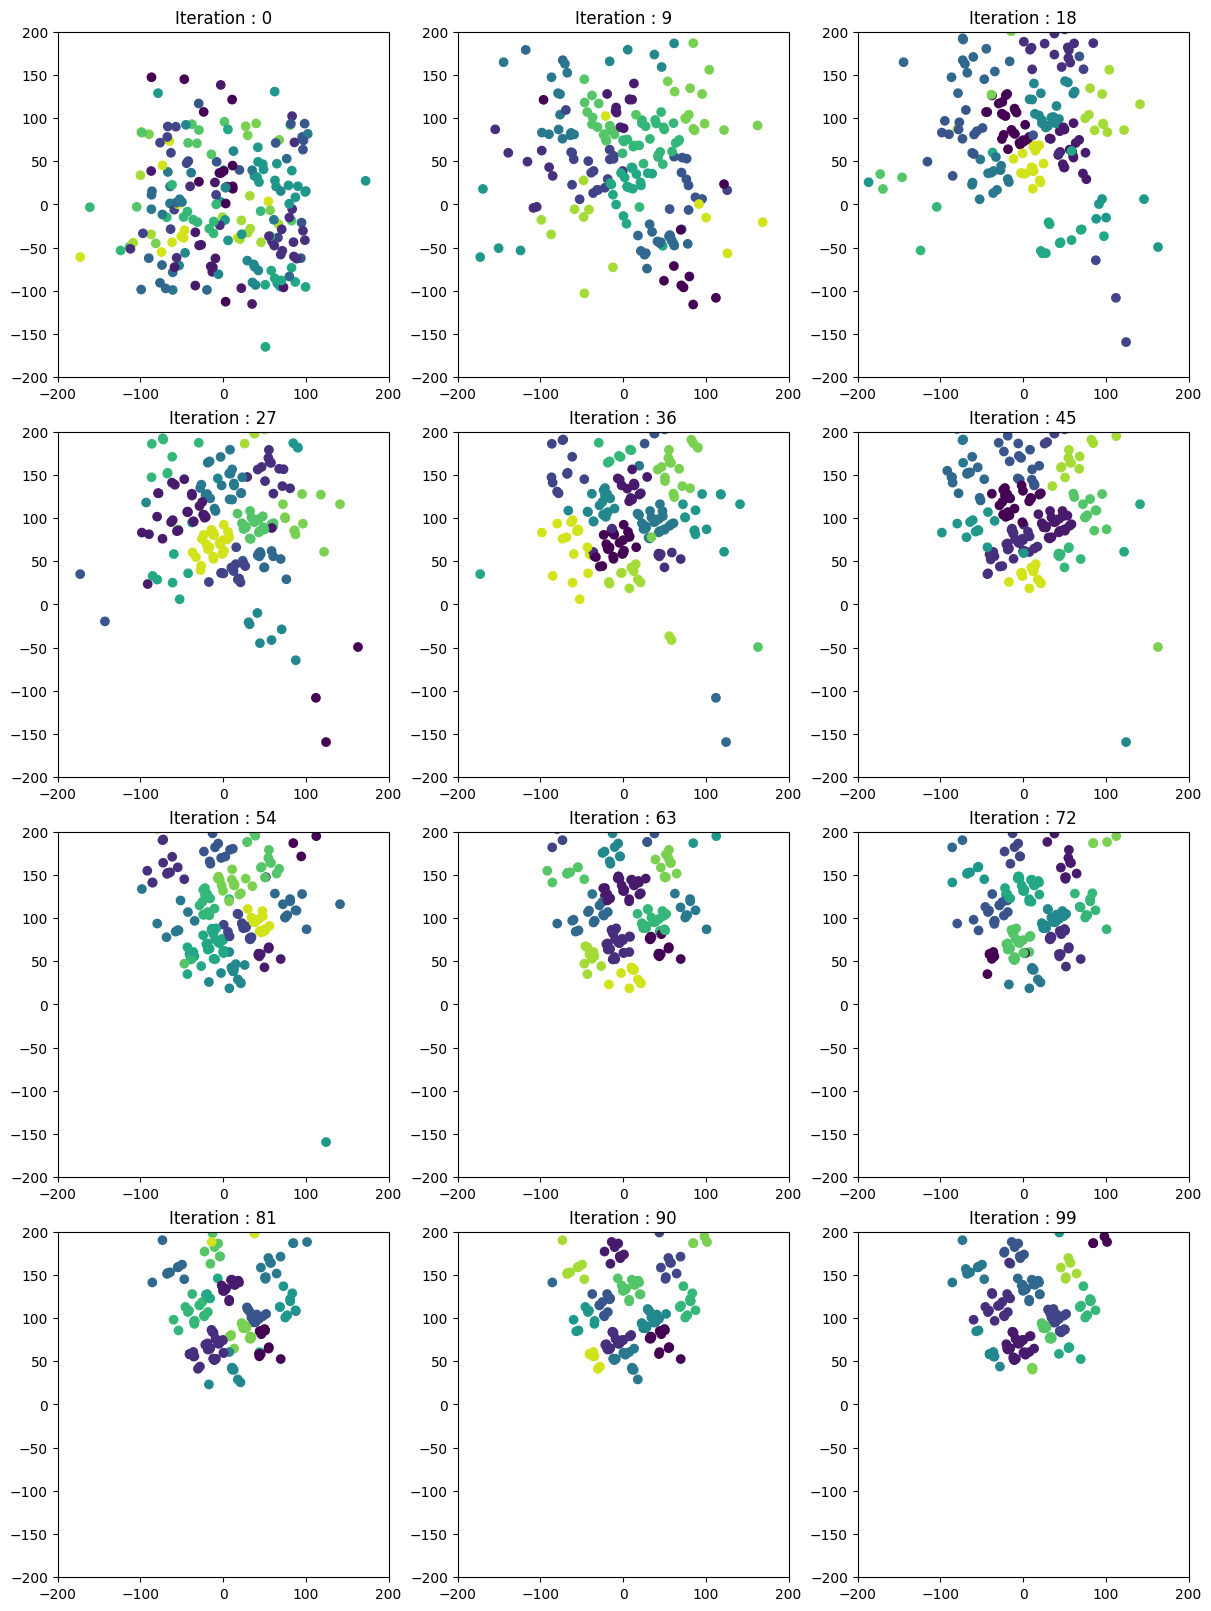

In [16]:
SubPlot_kw = {'autoscale_on':False,'xbound':(-200,200),'ybound':(-200,200)}
Scatter_kw = {'vmin':0,'vmax':clusteringAlgorithm_kw['n_clusters'],'cmap':'viridis'}

PlottingSnapshots(snapshots_kmeans,9,SubPlot_kw,Scatter_kw=Scatter_kw)